In [23]:
import torch
import numpy as np
import sys
sys.path.append("./../../Dataset/Prep/")
import fnirs_utils

In [24]:
#load the data for fnirs and fmri
datadir = "./../../Dataset/Data/fNIRS/fNIRS28-1.38/"
mri_data = torch.load('./../../Dataset/Data/SFN_data/hcpWM_sphere_10_MNI30.save')
fnirs_data = fnirs_utils.load28(datadir, 'HBC')
bad_channels = fnirs_utils.getBadChannels(datadir)


C:\Users\Alex\AppData\Local\Temp\ipykernel_33036\528648687.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  mri_data = torch.load('./../../Dataset/Data/SFN_data/hcpWM_sph

All zeros:  [ 21  24  25  29  31  33  34  35  41  44  52  54  62  64  82  83  84  85
  89  90  91  92  93  94  95 101 107 110 113 114]
Bad channels (excluding short separation): [ 23  27  29  31  32  38  41  49  58  77  78  79  83  84  85  86  87  88
  89 102 105 106]


(35, 85)
(35, 85)


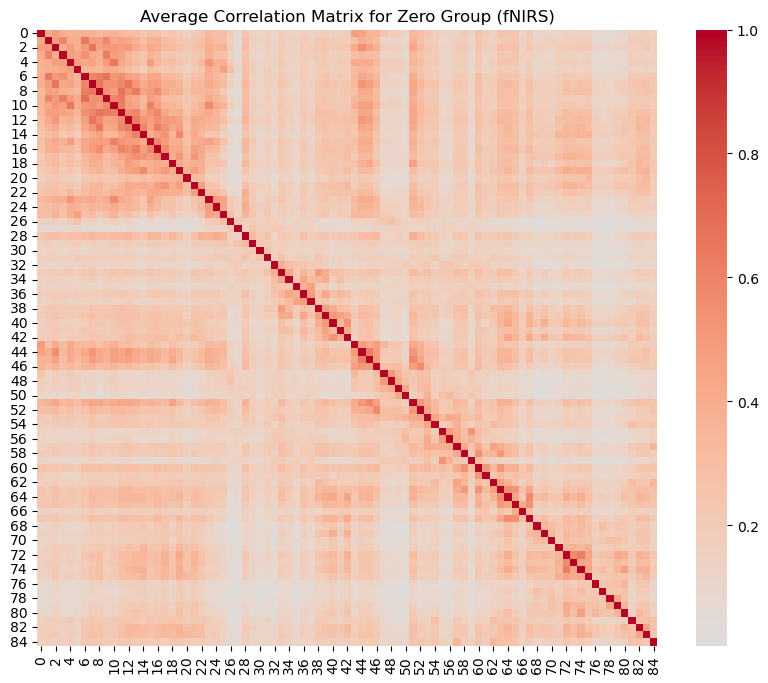

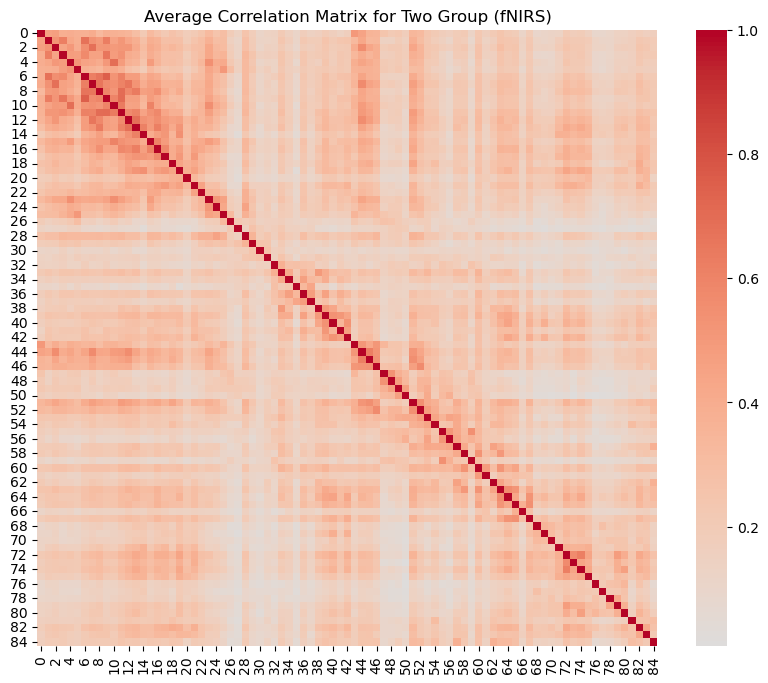

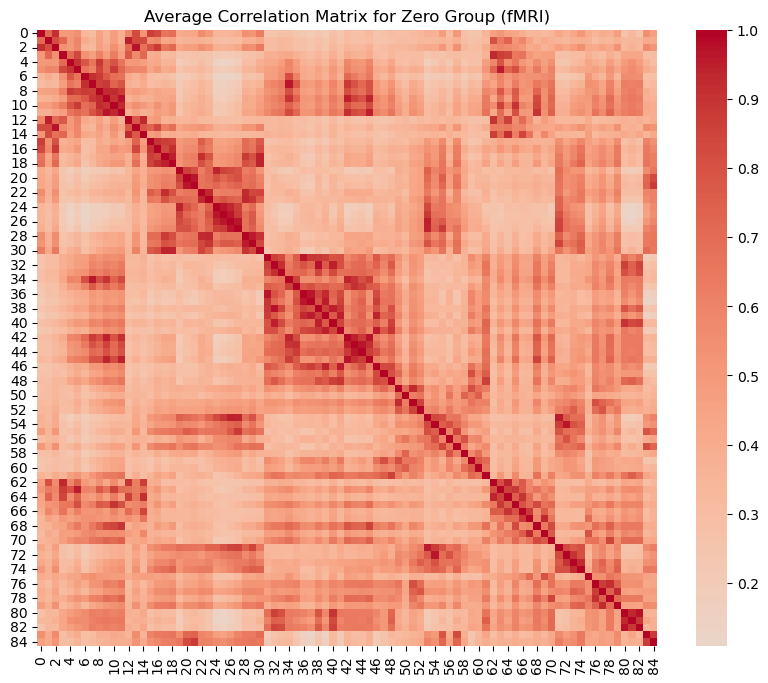

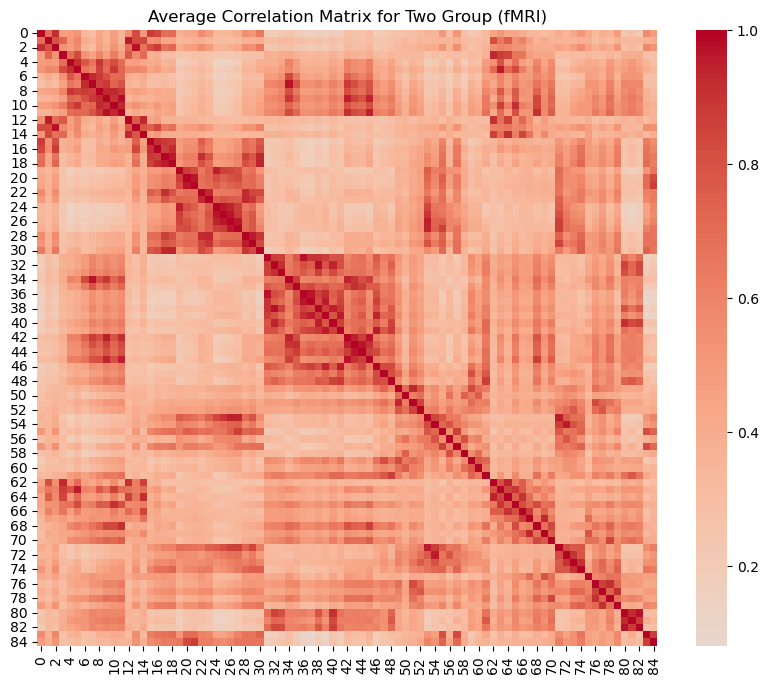

In [25]:
#calculate functional connectivity between each pair of channels
#select 200 fmri participants
n_participants = 1000
nmri_data = mri_data[:n_participants]
zero_mri = [x['roiTimeseries'] for x in nmri_data if x['pheno']['label'] == '0']
two_mri = [x['roiTimeseries'] for x in nmri_data if x['pheno']['label'] == '1']

zero_fnirs = [x['roiTimeseries'] for x in fnirs_data if x['pheno']['label'] == 0]
two_fnirs = [x['roiTimeseries'] for x in fnirs_data if x['pheno']['label'] == 1]
#filter out bad channels from fmri data
for i in range(len(zero_mri)):
    zero_mri[i] = np.delete(zero_mri[i], bad_channels, axis=1)
for i in range(len(two_mri)):
    two_mri[i] = np.delete(two_mri[i], bad_channels, axis=1)
#calculate the correlation between each pair of channels for each subject
print(zero_fnirs[0].shape)

zero_coors = np.zeros((len(zero_fnirs), zero_fnirs[0].shape[1], zero_fnirs[0].shape[1]))
two_coors = np.zeros((len(two_fnirs), two_fnirs[0].shape[1], two_fnirs[0].shape[1]))
for i in range(len(zero_fnirs)):
    zero_coors[i] = np.corrcoef(zero_fnirs[i].T)
for i in range(len(two_fnirs)):
    two_coors[i] = np.corrcoef(two_fnirs[i].T)
print(zero_mri[0].shape)
mri_zero_coors = np.zeros((len(zero_mri), zero_mri[0].shape[1], zero_mri[0].shape[1]))
mri_two_coors = np.zeros((len(two_mri), two_mri[0].shape[1], two_mri[0].shape[1]))
for i in range(len(zero_mri)):
    mri_zero_coors[i] = np.corrcoef(zero_mri[i].T)
for i in range(len(two_mri)):
    mri_two_coors[i] = np.corrcoef(two_mri[i].T)

average_zero_coors = np.mean(zero_coors, axis=0)
average_two_coors = np.mean(two_coors, axis=0)
average_mri_zero_coors = np.mean(mri_zero_coors, axis=0)
average_mri_two_coors = np.mean(mri_two_coors, axis=0)
#plot heatmap of the correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns
def plot_heatmap(data, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(data, cmap='coolwarm', center=0)
    plt.title(title)
    plt.show()
plot_heatmap(average_zero_coors, 'Average Correlation Matrix for Zero Group (fNIRS)')
plot_heatmap(average_two_coors, 'Average Correlation Matrix for Two Group (fNIRS)')
plot_heatmap(average_mri_zero_coors, 'Average Correlation Matrix for Zero Group (fMRI)')
plot_heatmap(average_mri_two_coors, 'Average Correlation Matrix for Two Group (fMRI)')


